# Rare Metabolic Gene Essentiality is a Determinant of Microniche Adaptation in Escherichia coli

## Introduction
The reconstruction of metabolic networks at the pangenome scale offers profound insights into the genetic diversity and metabolic capabilities within targeted taxa. In this study, we focus on Escherichia coli and apply a systematic approach to reconstruct genome-scale metabolic models (GEMs) across more than 15000 strains. This approach provides a detailed view of core, accessory, and rare metabolic reactions and their genetic basis, thereby revealing evolutionary patterns and niche-specific adaptations within the E. coli lineage.

For reconstruction and curation of panGEM please refer to our previously published notebook available at (https://github.com/omidard/EcopanGEM), if you use the scripts for panGEM reconstruction please kindly cite the following article (https://www.biorxiv.org/content/10.1101/2025.01.23.634541v1) 

## Objectives
This notebook is designed to reproduce the results and figures presented in the manuscript, with the primary objectives being to: 

1- Validation of GEMs for a subset of available strains a) using gene knock-out data b) using BioLog phenotyping data.
2- Simulation of E. coli's growth on feces, urine and serum as major E.coli niches in human body
3- detection of available nutrients in each body site supporting for growth of E. coli
4- predicting the fitness score of genes across panGEM in three mentioned biospecimens and M9 minimal media as a standard reference through extensive gene knock-out simulation.
5- identification of rare essential genes

## Methodology
we used cobrapy for analysing the panGEM

# 1- panGEM reconstruction - curation

For reconstruction and curation of panGEM please refer to our previously published notebook available at (https://github.com/omidard/EcopanGEM), if you use the scripts for panGEM reconstruction please kindly cite the following article (https://www.biorxiv.org/content/10.1101/2025.01.23.634541v1) 

# 2- Prediction of Fitness score of genes across feces, serum, urine and M9 media.
run following scripts in terminal - note that the fitness score prediction is computationally expensive, scripts are optimized to work on high performance virtual with 96 cores. running these scripts on lower configs may result in a prolonged computation time

1- media.py : contains functions for simulation of feces, serum, urine and M9 \
2- fva_ecoli_biosamples.py: Flux variability analysis (FVA) across all reactions of all strains on feces, seru, urine media \
3- upec_non_upec_feces_fva_comparison.py: FVA analysis of UPEC and non UPEC starins for comparison  \
4- serum_eco.py: Flux variability analysis across all GEMs on serum medium\
5- urine_eco.py: Flux variability analysis across all GEMs on urine medium\
6- feces_eco.py: Flux variability analysis across all GEMs on feces medium\
7- fitness_rare_m9.py: knock-out simulation on M9 medium\
8- fitness_rare_feces.py: knock-out simulation on feces medium\
9- fitness_rare_serum.py: knock-out simulation on serum medium\
10- fitness_rare_urine.py: knock-out simulation on urine medium\

11- master_feces_concat.py: concatenating the results of knock-out simulation on feces medium\
12- master_m9_concat.py: concatenating the results of knock-out simulation on M9 medium\
13- master_serum_concat.py: concatenating the results of knock-out simulation on serum medium\
14- master_urine_concat.py: concatenating the results of knock-out simulation on urine medium\
15- 
#### Once all the data are generated use the following cells for analysing and regenerating the results presented at article entitled "Rare Metabolic Gene Essentiality is a Determinant of Microniche Adaptation in Escherichia coli"

#### Note : all the data generated in this study are also available on zenodo () making it possible to run the notebook without performing the simulations simply to regerate the results

# 3- Load the metadate

In [2]:
import pandas as pd
file_path = "/curated_metadata_mash_filtered.pickle"

# Load the pickle file into a dataframe
meta = pd.read_pickle(file_path)
meta['genome_id'] = [v+'.gbk' for v in meta.genome_id]
meta.set_index(['genome_id'],inplace=True)
meta.fillna('no',inplace=True)
for i in meta.index:
    if meta.phylogroup[i]== 'cladeI':
        meta.phylogroup[i] = 'Clade I'
    if meta.phylogroup[i]== 'E or cladeI':
        meta.phylogroup[i] = 'E or Clade I'
meta.phylogroup.unique()
meta

/var/folders/g4/gzd2bm953vs0rn_qkz4wyd1w0000gp/T/ipykernel_95691/2773254481.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'no' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  meta.fillna('no',inplace=True)
/var/folders/g4/gzd2bm953vs0rn_qkz4wyd1w0000gp/T/ipykernel_95691/2773254481.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform 

,genome_name,organism_name,taxon_id,genome_status,strain,serovar,pathovar,culture_collection,completion_date,publication,...,oxygen_requirement,disease,comments,additional_metadata,phylo_init,genotype,substrain,MLST,phylogroup,mash_cluster
genome_id,,,,,,,,,,,,,,,,,,,,,
1446751.3.gbk,Escherichia coli O69:H11 str. 07-3763,no,1446751.0,WGS,07-3763,no,no,no,2014-06-11T00:00:00Z,no,...,no,no,PulseNet STEC genome reference library,no,no,no,no,21,B1,23
562.22040.gbk,Escherichia coli strain MOD1-EC6044,no,562.0,WGS,strain MOD1-EC6044,O6:H31,no,no,2017-10-13T00:00:00Z,no,...,no,no,Whole genome sequencing of cultured E. coli as...,collected_by:FDA,no,no,no,127,B2,6
1181766.3.gbk,Escherichia coli KTE220,Escherichia coli KTE220,1181766.0,WGS,KTE220,no,no,no,2012-12-19T00:00:00Z,no,...,no,no,Genome Sequencing of E. coli UTI Defensins,no,no,no,no,73,B2,5
562.16440.gbk,Escherichia coli strain OLC1062,no,562.0,WGS,strain OLC1062,O103:H2,no,no,2017-05-12T00:00:00Z,no,...,no,no,The comprehensive analysis of priority food pa...,sample_type:cell culture,no,vtx1a,no,17,B1,26
536056.3.gbk,Escherichia coli DH1,Escherichia coli DH1,536056.0,Complete,DH1,no,no,no,2009-10-05T00:00:00Z,no,...,Facultative,no,Escherichia coli DH1. Escherichia coli DH1 is ...,no,no,no,no,1060,A,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625.135.gbk,Shigella sp. strain UBA12579,no,625.0,WGS,strain UBA12579,no,no,no,2018-09-10T00:00:00Z,30148503,...,no,no,"Collection of 3,087 bacterial metagenome-assem...",sample_type:metagenomic assembly,no,no,no,93,A,22
625.112.gbk,Shigella sp. strain UBA8062,no,625.0,WGS,strain UBA8062,no,no,no,2018-09-10T00:00:00Z,30148503,...,no,no,"Collection of 3,087 bacterial metagenome-assem...",sample_type:metagenomic assembly,no,no,no,93,A,22
625.113.gbk,Shigella sp. strain UBA12342,no,625.0,WGS,strain UBA12342,no,no,no,2018-09-10T00:00:00Z,30148503,...,no,no,"Collection of 3,087 bacterial metagenome-assem...",sample_type:metagenomic assembly,no,no,no,93,A,22


# 4- TSNE clustering of fluxes of all gems across simulated media to cluster GEMs based on their metabolic states

Shape of X_no_outliers: (6939, 2753)
Cluster Feces top features:
Unnamed: 0
CRNt2rpp        1000.0
ADK1            1000.0
ADK3            1000.0
GLYCLTt2rpp     1000.0
VALTA           1000.0
SUCCt1pp        1000.0
ICHORS_copy2    1000.0
CAt6pp          1000.0
PROt2rpp        1000.0
NDPK1           1000.0
Name: Feces, dtype: float64

Cluster Serum top features:
Unnamed: 0
SUCFUMtpp      1000.0
VALTA          1000.0
ADK3           1000.0
ADK1           1000.0
GLYCLTt2rpp    1000.0
ACt2rpp        1000.0
TRSARr         1000.0
SUCCt1pp       1000.0
FUMt1pp        1000.0
ALATA_L        1000.0
Name: Serum, dtype: float64

Cluster Urine top features:
Unnamed: 0
SUCFUMtpp      1000.0
GLUt2rpp       1000.0
CRNt2rpp       1000.0
CAt6pp         1000.0
ALATA_L        1000.0
NDPK1          1000.0
FUMt1pp        1000.0
SUCCt1pp       1000.0
VPAMTr         1000.0
GLYCLTt2rpp    1000.0
Name: Urine, dtype: float64

Cluster Urine UPEC enriched top features:
Unnamed: 0
ICHORS_copy2    1000.0
CAt6pp       

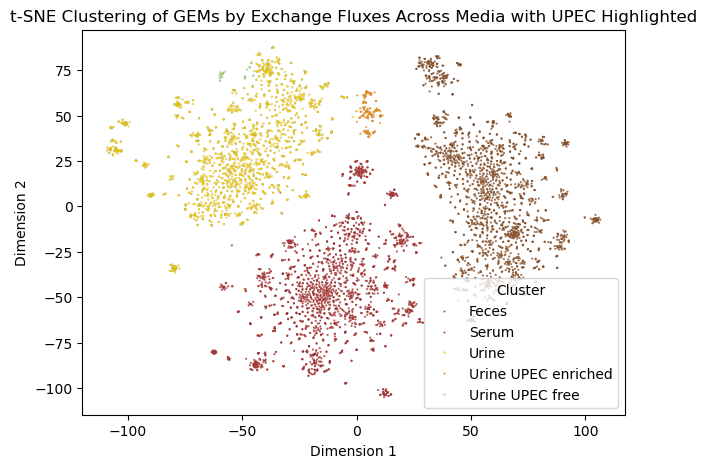

In [3]:
import os
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataframes
feces_file_path = "/all_models_feces_fva_results.csv"
feces = pd.read_csv(feces_file_path)
feces.set_index('Unnamed: 0', inplace=True)

serum_file_path = "/all_models_serum_fva_results.csv"
serum = pd.read_csv(serum_file_path)
serum.set_index('Unnamed: 0', inplace=True)

urine_file_path = "/all_models_urine_fva_results.csv"
urine = pd.read_csv(urine_file_path)
urine.set_index('Unnamed: 0', inplace=True)

# Filter columns to include only those with "min" in their name
feces_min = feces.filter(like='_min_')
serum_min = serum.filter(like='_min_')
urine_min = urine.filter(like='_min_')

# Transpose the DataFrames
feces_t = feces_min.T
serum_t = serum_min.T
urine_t = urine_min.T

# Ensure consistent columns across all dataframes
common_columns = feces_t.columns.intersection(serum_t.columns).intersection(urine_t.columns)

feces_t = feces_t[common_columns]
serum_t = serum_t[common_columns]
urine_t = urine_t[common_columns]

# Combine the transposed dataframes and assign labels
feces_t['Media'] = 'Feces'
serum_t['Media'] = 'Serum'
urine_t['Media'] = 'Urine'

combined_t_df = pd.concat([feces_t, serum_t, urine_t], axis=0)

# Ensure all data is numeric and handle missing values
X = combined_t_df.drop(columns=['Media']).apply(pd.to_numeric, errors='coerce').fillna(0)
y = combined_t_df['Media']

# Remove outliers (values outside 2.6 standard deviations)
def remove_outliers(df, y):
    mask = (np.abs(df - df.mean()) <= (2000 * df.std())).all(axis=1)
    return df[mask], y[mask]

X_no_outliers, y_no_outliers = remove_outliers(X, y)

# Check if X_no_outliers is empty or has non-numeric values
print(f"Shape of X_no_outliers: {X_no_outliers.shape}")
if X_no_outliers.empty:
    raise ValueError("The dataframe X_no_outliers is empty after removing outliers.")
if not np.issubdtype(X_no_outliers.values.dtype, np.number):
    raise ValueError("The dataframe X_no_outliers contains non-numeric values.")

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_outliers)

# Perform t-SNE analysis
tsne = TSNE(n_components=2, random_state=47,early_exaggeration=1)#perplexity=50,early_exaggeration=5
X_tsne = tsne.fit_transform(X_scaled)

# Create a dataframe with the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['Media'] = y_no_outliers.values
tsne_df.index = X_no_outliers.index  # Ensure the indices are the same as X_no_outliers

# Manually assign cluster labels based on visual inspection
tsne_df['Cluster'] = "Urine"  # Default cluster
#tsne_df.loc[(-90 < tsne_df['Dim1']) & (tsne_df['Dim1'] < -80) & (10 < tsne_df['Dim2']) & (tsne_df['Dim2'] < 20) & (tsne_df['Media'] == 'Urine'), 'Cluster'] = "Urine 1"
tsne_df.loc[(0 < tsne_df['Dim1']) & (tsne_df['Dim1'] < 25) & (30 < tsne_df['Dim2']) & (tsne_df['Dim2'] < 70) & (tsne_df['Media'] == 'Urine'), 'Cluster'] = "Urine UPEC enriched"
tsne_df.loc[(-70 < tsne_df['Dim1']) & (tsne_df['Dim1'] < -45) & (66 < tsne_df['Dim2']) & (tsne_df['Dim2'] < 100) & (tsne_df['Media'] == 'Urine'), 'Cluster'] = "Urine UPEC free"
#tsne_df.loc[(-77 < tsne_df['Dim1']) & (tsne_df['Dim1'] < -60) & (-45 < tsne_df['Dim2']) & (tsne_df['Dim2'] < -30) & (tsne_df['Media'] == 'Urine'), 'Cluster'] = "Urine 4"
#tsne_df.loc[(-72 < tsne_df['Dim1']) & (tsne_df['Dim1'] < -60) & (-19 < tsne_df['Dim2']) & (tsne_df['Dim2'] < -1) & (tsne_df['Media'] == 'Urine'), 'Cluster'] = "Urine 5"
tsne_df.loc[(tsne_df['Media'] == 'Feces'), 'Cluster'] = "Feces"
tsne_df.loc[(tsne_df['Media'] == 'Serum'), 'Cluster'] = "Serum"

# Filter combined_t_df to keep only the rows that match X_no_outliers
combined_t_df_no_outliers = combined_t_df.loc[X_no_outliers.index]

# Add the Cluster information to combined_t_df_no_outliers
combined_t_df_no_outliers['Cluster'] = tsne_df['Cluster']

# Combine the t-SNE results with the filtered original data
combined_data = combined_t_df_no_outliers  # Indices are preserved

# Select only numeric columns for calculating the mean
numeric_columns = combined_data.select_dtypes(include='number').columns
cluster_means = combined_data.groupby('Cluster')[numeric_columns].mean()

# Identify top features for each cluster
top_features_by_cluster = {}
for cluster in cluster_means.index:
    top_features = cluster_means.loc[cluster].abs().sort_values(ascending=False).head(10)
    top_features_by_cluster[cluster] = top_features

# Print or save the top features by cluster
for cluster, features in top_features_by_cluster.items():
    print(f"Cluster {cluster} top features:\n{features}\n")

# Initialize UPEC indicator column
tsne_df['Is_UPEC'] = False

# Define UPEC keywords for identification
upec_keywords = ["Urinary tract infection", " UTI ",
                 "Recurrent UTI", "rUTI", "Uropathogenic Escherichia coli", "UPEC","Uropathogenic"]# "Bladder", "Urethra", "Kidneys","Bacteriuria", "Cystitis", "Chronic cystitis","Septicemia","Urosepsis","ExPEC"

# Mark UPEC strains
for i in tsne_df.index:
    if combined_data.loc[i, 'Cluster'].startswith('Urine'):
        genome_id = i.replace('_min_urine', '').replace('_max_urine_', '')
        if genome_id in meta.index and any(keyword in meta.loc[genome_id].to_string() for keyword in upec_keywords):
            tsne_df.loc[i, 'Is_UPEC'] = True
    if combined_data.loc[i, 'Cluster'].startswith('Feces'):
        genome_id = i.replace('_min_feces', '').replace('_max_feces', '')
        if genome_id in meta.index and any(keyword in meta.loc[genome_id].to_string() for keyword in upec_keywords):
            tsne_df.loc[i, 'Is_UPEC'] = True
    if combined_data.loc[i, 'Cluster'].startswith('Serum'):
        genome_id = i.replace('_min_serum', '').replace('_max_serum', '')
        if genome_id in meta.index and any(keyword in meta.loc[genome_id].to_string() for keyword in upec_keywords):
            tsne_df.loc[i, 'Is_UPEC'] = True

# Plot the t-SNE results with manually assigned clusters and UPEC highlighting
palette = ["#8b4513","#b22222","#ffd700","#ff8c00","#abe781"]
plt.figure(figsize=(7, 5))
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='Cluster', palette=palette, legend='full', alpha=0.8,s=2,edgecolor='gray')

# Overlay UPEC points with specific edge color and linewidth
for i in tsne_df.index:
    if tsne_df.loc[i, 'Is_UPEC']:
        plt.scatter(tsne_df.loc[i, 'Dim1'], tsne_df.loc[i, 'Dim2'], edgecolor='black', linewidth=1, facecolor='none',s=2)

plt.title('t-SNE Clustering of GEMs by Exchange Fluxes Across Media with UPEC Highlighted')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
plt.grid(False)

#plt.savefig('/Users/omidard/Desktop/EcolipanGEM_final_panels/raw/exchange_panel_tsne_modified.svg', dpi=400, bbox_inches='tight')
plt.show()

# 4- Nutrient availability across simulated media

In [5]:
# Load the feces data
feces_file_path = "/feces_eco_fva.csv"
feaces = pd.read_csv(feces_file_path)
feaces.set_index('Unnamed: 0', inplace=True)

# Process the feces data
feaces_dropped1 = feaces.iloc[:, ::2]
feaces_dropped2 = feaces.iloc[:, 1::2]
feaces_final1 = feaces_dropped1.fillna(0)
feaces_final2 = feaces_dropped2.fillna(0)
feaces_final2.columns = feaces_final2.columns.str.replace('.json_max_feces', '.gbk')
feaces_final1.columns = feaces_final1.columns.str.replace('.json_min_feces', '.gbk')
feaces_final1 = feaces_final1.transpose()

# Load the serum data
serum_file_path = "/serum_eco_fva.csv"
serum = pd.read_csv(serum_file_path)
serum.set_index('Unnamed: 0', inplace=True)

# Process the serum data
serum_dropped1 = serum.iloc[:, ::2]
serum_dropped2 = serum.iloc[:, 1::2]
serum_final1 = serum_dropped1.fillna(0)
serum_final2 = serum_dropped2.fillna(0)
serum_final2.columns = serum_final2.columns.str.replace('.json_max_serum', '.gbk')
serum_final1.columns = serum_final1.columns.str.replace('.json_min_serum', '.gbk')
serum_final1 = serum_final1.transpose()

# Load the urine data
urine_file_path = "/urine_eco_fva.csv"
urine = pd.read_csv(urine_file_path)
urine.set_index('Unnamed: 0', inplace=True)

# Process the urine data
urine_dropped1 = urine.iloc[:, ::2]
urine_dropped2 = urine.iloc[:, 1::2]
urine_final1 = urine_dropped1.fillna(0)
urine_final2 = urine_dropped2.fillna(0)
urine_final2.columns = urine_final2.columns.str.replace('.json_max_urine', '.gbk')
urine_final1.columns = urine_final1.columns.str.replace('.json_min_urine', '.gbk')
urine_final1 = urine_final1.transpose()

<Figure size 2000x2000 with 0 Axes>

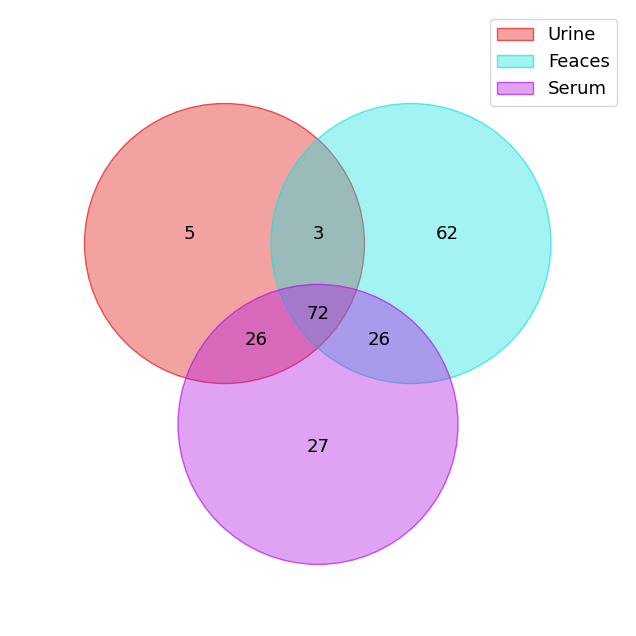

In [6]:
import matplotlib.pyplot as plt
from venn import venn
from matplotlib.colors import ListedColormap


# Extract the indexes from each dataframe
urine_indexes = set(urine_final2.index)
feaces_indexes = set(feaces_final2.index)
serum_indexes = set(serum_final2.index)

# Prepare the data for the venn function
data = {
    'Urine': urine_indexes,
    'Feaces': feaces_indexes,
    'Serum': serum_indexes
}

# Define a warmer color map
warm_colors = ListedColormap(["#e31717", "#d9e317", "#39e317", "#17e3e0", "#1717e3", "#b317e3"])

# Plot the Venn diagram with warmer colors
plt.figure(figsize=(20, 20))
venn(data, cmap=warm_colors)
#plt.title('Venn Diagram of Indexes from Urine, Feaces, and Serum DataFrames', fontsize=20)
#plt.savefig('/Users/omidard/data/pangemdata/venn_media_reactions_consumption.svg', dpi=800, bbox_inches='tight')
#plt.savefig('/Users/omidard/data/pangemdata/venn_media_reactions_consumption.png', dpi=800, bbox_inches='tight')
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/upsetplot/plotting.py:660: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/opt/anaconda3/lib/python3.9/site-packages/upsetplot/plotting.py:661: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

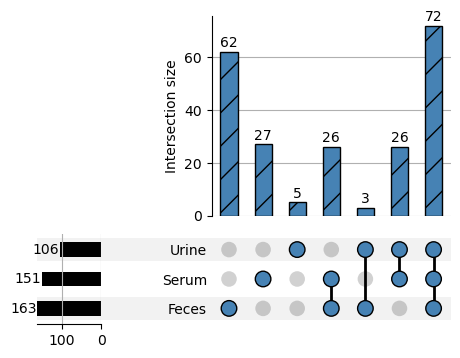

In [7]:
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators
import pandas as pd


# Extract the indexes from each dataframe
urine_indexes = set(urine_final2.index)
feaces_indexes = set(feaces_final2.index)
serum_indexes = set(serum_final2.index)

# Prepare the data for the UpSet plot
data = {
    'Urine': urine_indexes,
    'Feaces': feaces_indexes,
    'Serum': serum_indexes
}

# Create a DataFrame with boolean values for each index
all_indexes = list(urine_indexes | feaces_indexes | serum_indexes)
df_binary = pd.DataFrame(index=all_indexes)

df_binary['Urine'] = df_binary.index.isin(urine_indexes)
df_binary['Feces'] = df_binary.index.isin(feaces_indexes)
df_binary['Serum'] = df_binary.index.isin(serum_indexes)

# Convert the DataFrame to a format suitable for UpSet plot
upset_data = from_indicators(df_binary)

# Create the UpSet plot
upset = UpSet(upset_data, subset_size='count', show_counts=True, sort_by='degree')
upset.style_subsets(min_subset_size=2, facecolor="steelblue", edgecolor="black", hatch="/")
upset.plot()

# Save the UpSet plot
#plt.title('UpSet Plot of Indexes from Urine, Feces, and Serum DataFrames', fontsize=16)
#plt.savefig('/Users/omidard/data/pangemdata/upset_media_reactions_consumption.svg', dpi=800, bbox_inches='tight')
#plt.savefig('/Users/omidard/data/pangemdata/upset_media_reactions_consumption.png', dpi=800, bbox_inches='tight')
plt.show()

# 5-Validation of Knock-out results (gene essentiality)
 --> run knock_out_validation.py

In [8]:
# Load the DataFrame
filtered_df = pd.read_csv("/knock_out_validation_df.csv")

Confusion Matrix:
[[7908  113]
 [ 564 1447]]
True Negatives (TN): 7908 (78.83%)
False Positives (FP): 113 (1.13%)
False Negatives (FN): 564 (5.62%)
True Positives (TP): 1447 (14.42%)
Accuracy: 93.25%
Precision: 92.76%


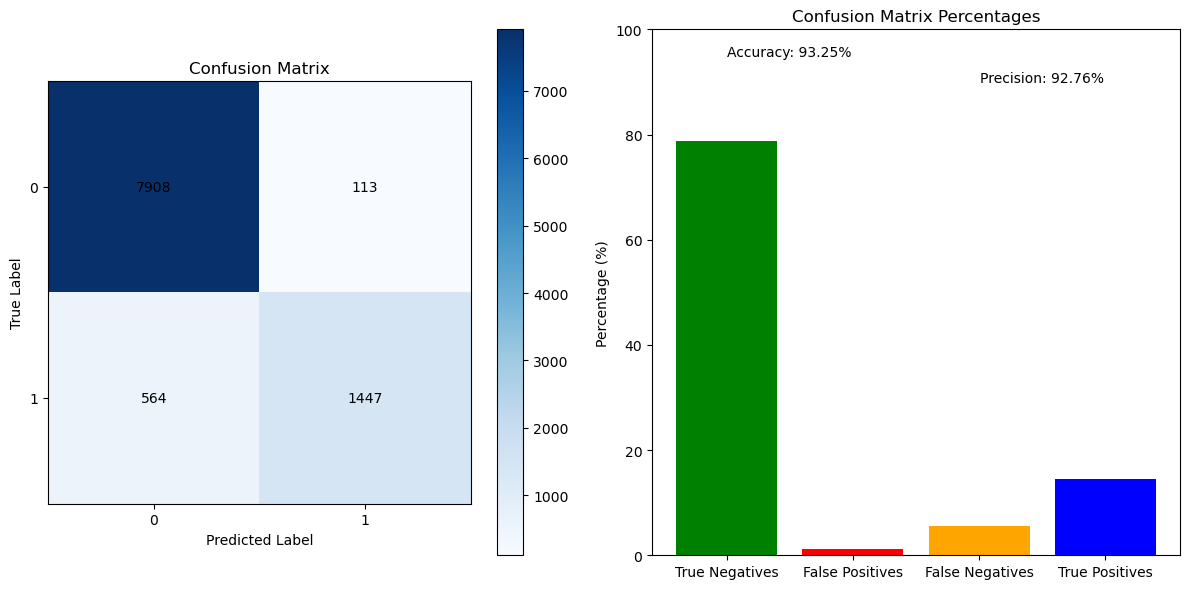

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# Function to process duplicates for each strain
def process_duplicates(df):
    def filter_gene(group):
        # Case 1: All copies have the same prediction and validation
        if (group['prediction'] == group['validation']).all():
            return group.iloc[0]  # Keep the first copy (arbitrary choice)

        # Case 2: Varying prediction and validation
        matched = group[group['prediction'] == group['validation']]
        if not matched.empty:
            return matched.iloc[0]  # Keep the first matching copy
        else:
            return group.iloc[0]  # If no matches, keep one copy (arbitrary)

    return df.groupby('gene', group_keys=False).apply(filter_gene)


# Compute confusion matrix
conf_matrix = confusion_matrix(filtered_df['validation'], filtered_df['prediction'])

# Extract confusion matrix values
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate percentages
total = tn + fp + fn + tp
tn_perc = tn / total * 100
fp_perc = fp / total * 100
fn_perc = fn / total * 100
tp_perc = tp / total * 100

# Calculate accuracy and precision
accuracy = accuracy_score(filtered_df['validation'], filtered_df['prediction']) * 100
precision = precision_score(filtered_df['validation'], filtered_df['prediction'], zero_division=0) * 100

# Print metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives (TN): {tn} ({tn_perc:.2f}%)")
print(f"False Positives (FP): {fp} ({fp_perc:.2f}%)")
print(f"False Negatives (FN): {fn} ({fn_perc:.2f}%)")
print(f"True Positives (TP): {tp} ({tp_perc:.2f}%)")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")

# Plot confusion matrix and metrics
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix plot
im = ax[0].imshow(conf_matrix, cmap='Blues', interpolation='nearest')
ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[0].set_xticks([0, 1])
ax[0].set_yticks([0, 1])
ax[0].set_xticklabels(['0', '1'])
ax[0].set_yticklabels(['0', '1'])
plt.colorbar(im, ax=ax[0])

# Add text annotations to the confusion matrix
for i in range(2):
    for j in range(2):
        ax[0].text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

# Bar plot for percentages
metrics = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
values = [tn_perc, fp_perc, fn_perc, tp_perc]
ax[1].bar(metrics, values, color=['green', 'red', 'orange', 'blue'])
ax[1].set_title("Confusion Matrix Percentages")
ax[1].set_ylabel("Percentage (%)")
ax[1].set_ylim(0, 100)

# Show the accuracy and precision on the bar plot
ax[1].text(0.5, 95, f"Accuracy: {accuracy:.2f}%", fontsize=10, color='black', ha='center')
ax[1].text(2.5, 90, f"Precision: {precision:.2f}%", fontsize=10, color='black', ha='center')

plt.tight_layout()

# Save the plot
#plt.savefig('/Users/omidard/Desktop/knock_out_validation_conf_cleaned.svg', dpi=400, bbox_inches='tight')
plt.show()

# 6-Analysing the fitness scores

In [1]:
import pandas as pd
file_path = "/header_to_allele.pickle"

# Load the pickle file into a dataframe
header_to_allele = pd.read_pickle(file_path)
#A_full.set_index(['genome_id'],inplace=True)

def modify_dict(data_dict):
    modified_dict = {}
    for key, value in data_dict.items():
        # Split the value at 'A' and keep the first part
        new_value = value.split('A')[0]
        modified_dict[key] = new_value
    return modified_dict

# Modify the dictionary
locustags_genes_mapping = modify_dict(header_to_allele)

# Print the modified dictionary
locustags_genes_mapping

{'BBKHDDAB_03778': 'Ecoli_C0',
 'KFBCFEFE_03557': 'Ecoli_C0',
 'DNGABGOA_03884': 'Ecoli_C0',
 'AHDKOGMP_03089': 'Ecoli_C0',
 'CJKFKDKI_01838': 'Ecoli_C0',
 'GNDBFKPA_02983': 'Ecoli_C0',
 'ANJIHKCJ_03547': 'Ecoli_C0',
 'PLCBHIOM_04055': 'Ecoli_C0',
 'ONOCBOBE_02933': 'Ecoli_C0',
 'JNPBCNLI_00521': 'Ecoli_C0',
 'KPHBLICJ_04060': 'Ecoli_C0',
 'JGMMIOMP_03087': 'Ecoli_C0',
 'MBJPMDFF_00475': 'Ecoli_C0',
 'GDMGGFFG_03261': 'Ecoli_C0',
 'GPIJCMCA_03681': 'Ecoli_C0',
 'IFBKKINJ_01001': 'Ecoli_C0',
 'LPDJNCPB_03588': 'Ecoli_C0',
 'HPMLCMLC_03085': 'Ecoli_C0',
 'OALKNDKA_01117': 'Ecoli_C0',
 'JMGNIANH_03335': 'Ecoli_C0',
 'DKLKPNIC_04162': 'Ecoli_C0',
 'PAMFKPGO_03510': 'Ecoli_C0',
 'DDNCHAMH_03592': 'Ecoli_C0',
 'FPIMDBNL_03589': 'Ecoli_C0',
 'EBJKCNLA_02535': 'Ecoli_C0',
 'OGODHCNI_00478': 'Ecoli_C0',
 'JLACKDGD_01093': 'Ecoli_C0',
 'PKBLMMKC_01287': 'Ecoli_C0',
 'AJFMKLKB_03275': 'Ecoli_C0',
 'HIJIIMMF_03638': 'Ecoli_C0',
 'EEIJOICD_03834': 'Ecoli_C0',
 'IOMMJHKB_00468': 'Ecoli_C0',
 'JKLLJE

In [3]:
import pandas as pd
file_path = '/ess_mapped_genes_with_category.csv'
gene_cats = pd.read_csv(file_path)
gene_cats

,locus_tag,Essential,gene_name,Category
0,EPJPPNAH_02825,0,Ecoli_C6620,Core
1,EPJPPNAH_00232,0,Ecoli_C34348,Rare
2,EPJPPNAH_00920,0,Ecoli_C29968,Accessory
3,EPJPPNAH_01370,0,Ecoli_C23968,Rare
4,EPJPPNAH_02206,0,Ecoli_C33756,Core
...,...,...,...,...
10809018,BELAINIL_03275,0,Ecoli_C40265,Core
10809019,BELAINIL_01264,0,Ecoli_C34348,Rare
10809020,BELAINIL_02060,0,Ecoli_C29968,Accessory
10809021,BELAINIL_02729,0,Ecoli_C23968,Rare


In [4]:
import pandas as pd

# Specify the path to the Parquet file
file_path = '/master_m9_knockout.csv'

# Use pandas to read the compressed pickle file
master_df_m9 = pd.read_csv(file_path)
#df_core_accessory = df[df['Category'] != 'Rare']
#df_Rare_TEs = df[df['Category'] == 'Rare']
master_df_m9['fitness'] = pd.to_numeric(master_df_m9['fitness'], errors='coerce').fillna(0)
master_df_m9['fitness'].fillna(0, inplace=True)
master_df_m9['gpr'].fillna('GAP', inplace=True)
master_df_m9['wildtype_growth_rate'].fillna(0, inplace=True)
master_df_m9['knock_out_growth_rate'].fillna(0, inplace=True)
master_df_m9['model_id'] = master_df_m9['model_id'].str.replace('.json.json', '')
master_df_m9


/var/folders/g4/gzd2bm953vs0rn_qkz4wyd1w0000gp/T/ipykernel_72352/2699748753.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_df_m9['fitness'].fillna(0, inplace=True)
/var/folders/g4/gzd2bm953vs0rn_qkz4wyd1w0000gp/T/ipykernel_72352/2699748753.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

,model_id,reaction_id,wildtype_growth_rate,knock_out_growth_rate,fitness,media_name,gpr
0,562.7247,3NTD7pp,0.093,0.093,0.0,m9_aerobic,EPJPPNAH_04184 or EPJPPNAH_00375
1,562.7247,2DGULRy,0.093,0.093,0.0,m9_aerobic,EPJPPNAH_03527
2,562.7247,12PPDRtex,0.093,0.093,0.0,m9_aerobic,EPJPPNAH_00232 or EPJPPNAH_00920 or EPJPPNAH_0...
3,562.7247,2AGPE180tipp,0.093,0.093,0.0,m9_aerobic,EPJPPNAH_02824
4,562.7247,23DOGULNt4pp,0.093,0.093,0.0,m9_aerobic,EPJPPNAH_03553 and EPJPPNAH_03555 and EPJPPNAH...
...,...,...,...,...,...,...,...
5611333,562.78039,YUMPS,0.093,0.093,0.0,m9_aerobic,BELAINIL_03558
5611334,562.78039,ZN2tpp,0.093,0.093,0.0,m9_aerobic,BELAINIL_04537
5611335,562.78039,Zn2tex,0.093,0.000,100.0,m9_aerobic,BELAINIL_01264 or BELAINIL_02060 or BELAINIL_0...
5611336,562.78039,XYLUt2pp,0.093,0.093,0.0,m9_aerobic,BELAINIL_00039 and BELAINIL_00040 and BELAINIL...


In [6]:
import pandas as pd

# Specify the path to the Parquet file
file_path = '/master_feces_knockout.csv'

# Use pandas to read the compressed pickle file
master_df_feces = pd.read_csv(file_path)
#df_core_accessory = df[df['Category'] != 'Rare']
#df_Rare_TEs = df[df['Category'] == 'Rare']
master_df_feces['fitness'] = pd.to_numeric(master_df_feces['fitness'], errors='coerce').fillna(0)
master_df_feces['fitness'].fillna(0, inplace=True)
master_df_feces['gpr'].fillna('GAP', inplace=True)
master_df_feces['wildtype_growth_rate'].fillna(0, inplace=True)
master_df_feces['knock_out_growth_rate'].fillna(0, inplace=True)
master_df_feces['model_id'] = master_df_feces['model_id'].str.replace('.json.json', '')
master_df_feces

/var/folders/g4/gzd2bm953vs0rn_qkz4wyd1w0000gp/T/ipykernel_72352/235742824.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_df_feces['fitness'].fillna(0, inplace=True)
/var/folders/g4/gzd2bm953vs0rn_qkz4wyd1w0000gp/T/ipykernel_72352/235742824.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

,model_id,reaction_id,wildtype_growth_rate,knock_out_growth_rate,fitness,media_name,gpr
0,GCF_020883395.1,2AGPG141tipp,0.99,0.990,0.000,feces_media,DMBJDIID_01163
1,GCF_020883395.1,3HAD141,0.99,0.990,0.000,feces_media,DMBJDIID_03189 or DMBJDIID_04007
2,GCF_020883395.1,23DAPPAtex,0.99,0.990,0.000,feces_media,DMBJDIID_03923 or DMBJDIID_03214 or DMBJDIID_0...
3,GCF_020883395.1,2DGULRy,0.99,0.990,0.000,feces_media,DMBJDIID_00221
4,GCF_020883395.1,12PPDStex,0.99,0.979,1.154,feces_media,DMBJDIID_03923 or DMBJDIID_03214 or DMBJDIID_0...
...,...,...,...,...,...,...,...
5611333,GCF_900618295.1,YUMPS,0.99,0.990,0.000,feces_media,LAGNIJDH_03072
5611334,GCF_900618295.1,ZN2tpp,0.99,0.990,0.000,feces_media,LAGNIJDH_03960
5611335,GCF_900618295.1,XYLabcpp,0.99,0.990,0.000,feces_media,LAGNIJDH_04533 and LAGNIJDH_04531 and LAGNIJDH...
5611336,GCF_900618295.1,XYLt2pp,0.99,0.986,0.433,feces_media,LAGNIJDH_00280


In [7]:
import pandas as pd

# Specify the path to the Parquet file
file_path = '/master_serum_knockout.csv'

# Use pandas to read the compressed pickle file
master_df_serum = pd.read_csv(file_path)
#df_core_accessory = df[df['Category'] != 'Rare']
#df_Rare_TEs = df[df['Category'] == 'Rare']
master_df_serum['fitness'] = pd.to_numeric(master_df_serum['fitness'], errors='coerce').fillna(0)
master_df_serum['fitness'].fillna(0, inplace=True)
master_df_serum['gpr'].fillna('GAP', inplace=True)
master_df_serum['wildtype_growth_rate'].fillna(0, inplace=True)
master_df_serum['knock_out_growth_rate'].fillna(0, inplace=True)
master_df_serum['model_id'] = master_df_serum['model_id'].str.replace('.json.json', '')
master_df_serum

/var/folders/g4/gzd2bm953vs0rn_qkz4wyd1w0000gp/T/ipykernel_72352/114166818.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_df_serum['fitness'].fillna(0, inplace=True)
/var/folders/g4/gzd2bm953vs0rn_qkz4wyd1w0000gp/T/ipykernel_72352/114166818.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

,model_id,reaction_id,wildtype_growth_rate,knock_out_growth_rate,fitness,media_name,gpr
0,566546.4,2DGULRy,0.43,0.430,0.000,serum_media,KAFJKKHE_03761
1,566546.4,2AGPG181tipp,0.43,0.430,0.000,serum_media,KAFJKKHE_03032
2,566546.4,3NTD4pp,0.43,0.430,0.000,serum_media,KAFJKKHE_04504 or KAFJKKHE_00449 or KAFJKKHE_0...
3,566546.4,23DAPPAtex,0.43,0.430,0.000,serum_media,KAFJKKHE_00351 or KAFJKKHE_01026 or KAFJKKHE_0...
4,566546.4,2AGPG161tipp,0.43,0.430,0.000,serum_media,KAFJKKHE_03032
...,...,...,...,...,...,...,...
5611333,562.77537,XANtex,0.43,0.418,2.745,serum_media,CBNKGKBL_04179 or CBNKGKBL_03128 or CBNKGKBL_0...
5611334,562.77537,ZNabcpp,0.43,0.430,0.000,serum_media,CBNKGKBL_03989 and CBNKGKBL_03988 and CBNKGKBL...
5611335,562.77537,ZN2t3pp,0.43,0.430,0.000,serum_media,CBNKGKBL_02081 or CBNKGKBL_03567
5611336,562.77537,ZN2abcpp,0.43,0.430,0.000,serum_media,CBNKGKBL_01991


In [8]:
import pandas as pd

# Specify the path to the Parquet file
file_path = '/master_urine_knockout.csv'

# Use pandas to read the compressed pickle file
master_df_urine = pd.read_csv(file_path)
#df_core_accessory = df[df['Category'] != 'Rare']
#df_Rare_TEs = df[df['Category'] == 'Rare']
master_df_urine['fitness'] = pd.to_numeric(master_df_urine['fitness'], errors='coerce').fillna(0)
master_df_urine['fitness'].fillna(0, inplace=True)
master_df_urine['gpr'].fillna('GAP', inplace=True)
master_df_urine['wildtype_growth_rate'].fillna(0, inplace=True)
master_df_urine['knock_out_growth_rate'].fillna(0, inplace=True)
master_df_urine['model_id'] = master_df_urine['model_id'].str.replace('.json.json', '')
master_df_urine

/var/folders/g4/gzd2bm953vs0rn_qkz4wyd1w0000gp/T/ipykernel_72352/120385694.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_df_urine['fitness'].fillna(0, inplace=True)
/var/folders/g4/gzd2bm953vs0rn_qkz4wyd1w0000gp/T/ipykernel_72352/120385694.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

,model_id,reaction_id,wildtype_growth_rate,knock_out_growth_rate,fitness,media_name,gpr
0,562.13777,3HAD100,0.238,0.238,0.000,urine_media,LHNPANMO_03020 or LHNPANMO_03881
1,562.13777,2DOXG6PP,0.238,0.238,0.000,urine_media,LHNPANMO_04650 or LHNPANMO_02233 or LHNPANMO_0...
2,562.13777,23PDE4pp,0.238,0.238,0.000,urine_media,LHNPANMO_04244
3,562.13777,23PDE2pp,0.238,0.238,0.000,urine_media,LHNPANMO_04244
4,562.13777,34dhpactex,0.238,0.238,0.000,urine_media,LHNPANMO_03744 or LHNPANMO_03045 or LHNPANMO_0...
...,...,...,...,...,...,...,...
5611333,562.5746,ZN2tpp,0.238,0.238,0.000,urine_media,GDLIOLEB_02894
5611334,562.5746,XYLtex,0.238,0.229,3.622,urine_media,GDLIOLEB_00244 or GDLIOLEB_00921 or GDLIOLEB_0...
5611335,562.5746,XYLUt2pp,0.238,0.238,0.000,urine_media,GDLIOLEB_03431 and GDLIOLEB_03432 and GDLIOLEB...
5611336,562.5746,XPPT,0.238,0.238,0.000,urine_media,GDLIOLEB_00239


In [9]:
#m9
condition1 = master_df_m9['gpr'].str.contains(' and', na=False) & ~master_df_m9['gpr'].str.contains(' or', na=False)
condition2 = ~master_df_m9['gpr'].str.contains(' and', na=False) & ~master_df_m9['gpr'].str.contains(' or', na=False)
# Apply the conditions to create the 'boolean' column
master_df_m9['boolean'] = (condition1 | condition2).astype(int)

#feces
condition1 = master_df_feces['gpr'].str.contains(' and', na=False) & ~master_df_feces['gpr'].str.contains(' or', na=False)
condition2 = ~master_df_feces['gpr'].str.contains(' and', na=False) & ~master_df_feces['gpr'].str.contains(' or', na=False)
# Apply the conditions to create the 'boolean' column
master_df_feces['boolean'] = (condition1 | condition2).astype(int)

#serum
condition1 = master_df_serum['gpr'].str.contains(' and', na=False) & ~master_df_serum['gpr'].str.contains(' or', na=False)
condition2 = ~master_df_serum['gpr'].str.contains(' and', na=False) & ~master_df_serum['gpr'].str.contains(' or', na=False)
# Apply the conditions to create the 'boolean' column
master_df_serum['boolean'] = (condition1 | condition2).astype(int)

#urine
condition1 = master_df_urine['gpr'].str.contains(' and', na=False) & ~master_df_urine['gpr'].str.contains(' or', na=False)
condition2 = ~master_df_urine['gpr'].str.contains(' and', na=False) & ~master_df_urine['gpr'].str.contains(' or', na=False)
# Apply the conditions to create the 'boolean' column
master_df_urine['boolean'] = (condition1 | condition2).astype(int)

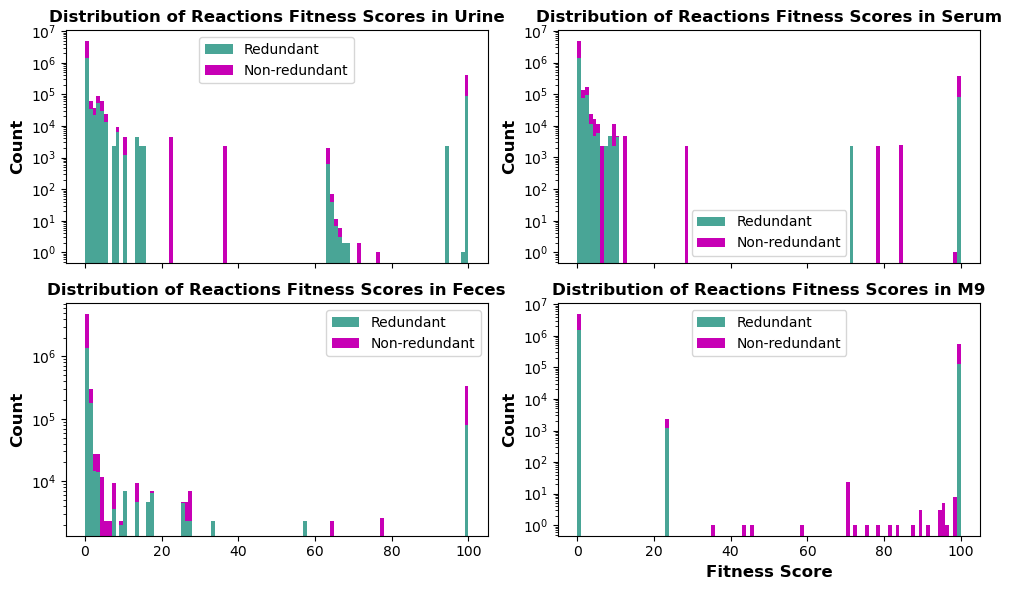

In [10]:
import matplotlib.pyplot as plt

# List of dataframes and corresponding labels
dfs = {
    "Urine": master_df_urine,
    "Serum": master_df_serum,
    "Feces": master_df_feces,
    "M9": master_df_m9
}

colors = ['#49a596', '#c700b5']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), sharex=True)
axes = axes.flatten()  # Flatten the 2x2 grid to make iteration easier

for ax, (label, df) in zip(axes, dfs.items()):
    ax.hist(
        [df[df['boolean'] == 0]['fitness'], df[df['boolean'] == 1]['fitness']],
        bins=100, stacked=True, color=colors, label=['Redundant', 'Non-redundant']
    )
    ax.set_yscale('log')
    ax.set_ylabel('Count', fontsize=12, weight='bold')
    ax.set_title(f'Distribution of Reactions Fitness Scores in {label}', fontsize=12, weight='bold')
    ax.legend(fontsize=10)
    ax.grid(False)
    ax.set_facecolor('white')

axes[-1].set_xlabel('Fitness Score', fontsize=12, weight='bold')

plt.tight_layout()
#plt.savefig('/Users/omidard/Desktop/EcolipanGEM_final_panels/raw/fitness_scores_distribution.svg', dpi=400, bbox_inches='tight')
plt.show()


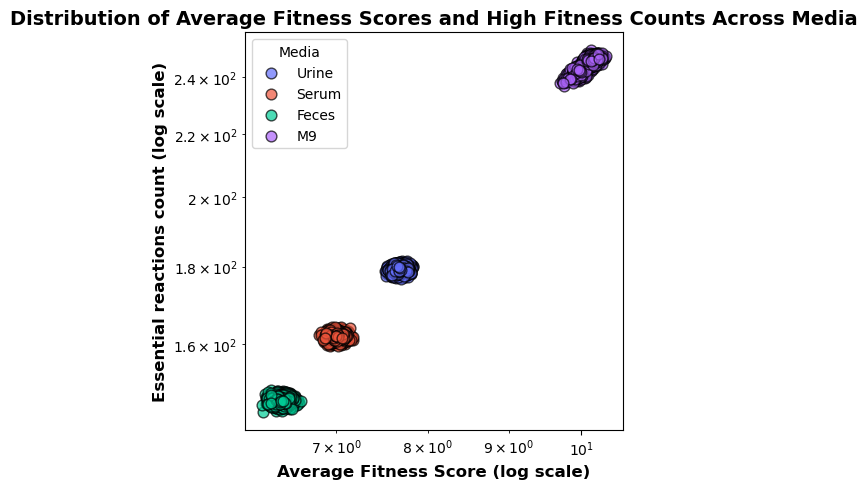

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store calculated data for each media
media_data = {
    "Urine": {"avg_fitness": [], ">95_count": []},
    "Serum": {"avg_fitness": [], ">95_count": []},
    "Feces": {"avg_fitness": [], ">95_count": []},
    "M9": {"avg_fitness": [], ">95_count": []}
}

# List of dataframes for each media
dfs = {
    "Urine": master_df_urine,
    "Serum": master_df_serum,
    "Feces": master_df_feces,
    "M9": master_df_m9
}

# Loop through each dataframe and calculate the desired metrics for each strain
for media, df in dfs.items():
    # Group by strain (model_id)
    grouped = df.groupby('model_id')
    
    # Calculate average fitness and count of fitness scores > 95 for each strain
    for model_id, group in grouped:
        avg_fitness = group['fitness'].mean()
        above_95_count = (group['fitness'] >= 95).sum()
        
        # Apply specific filtering for the outlier in Urine
        if media == "Urine" and avg_fitness > 20:
            continue  # Skip this outlier point in Urine
        
        # Store results with a small jitter
        media_data[media]["avg_fitness"].append(avg_fitness + np.random.normal(0, 0.05))
        media_data[media][">95_count"].append(above_95_count + np.random.normal(0, 0.7))

# Plotting setup
fig, ax = plt.subplots(figsize=(5, 5))

colors = {
    "Urine": "#636EFA",
    "Serum": "#EF553B",
    "Feces": "#00CC96",
    "M9": "#AB63FA"
}

# Scatter plot for each media
for media, color in colors.items():
    ax.scatter(
        media_data[media]["avg_fitness"],
        media_data[media][">95_count"],
        label=media,
        color=color,
        alpha=0.7,
        edgecolors="k",
        s=60
    )

# Set log scale for x and y axes
ax.set_xscale("log")
ax.set_yscale("log")

# Labeling
ax.set_xlabel("Average Fitness Score (log scale)", fontsize=12, weight='bold')
ax.set_ylabel("Essential reactions count (log scale)", fontsize=12, weight='bold')
ax.set_title("Distribution of Average Fitness Scores and High Fitness Counts Across Media", fontsize=14, weight='bold')
ax.legend(title="Media", fontsize=10)

# Remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# Display plot
plt.tight_layout()
#plt.savefig('/Users/omidard/Desktop/EcolipanGEM_final_panels/paper2/raw/strains_media_fitness_scores_scatter.svg', dpi=400, bbox_inches='tight')
plt.show()



In [12]:
total_fitness = pd.concat([master_df_feces, master_df_urine, master_df_serum, master_df_m9], ignore_index=True)
#total_fitness.to_csv('/total_fitness.csv', index=False)
total_fitness2 = total_fitness[total_fitness['boolean']==1]
total_fitness2 = total_fitness2[total_fitness2['fitness']!=0]
import pandas as pd

# Split the 'gpr' column by " and " or " or " into a list
total_fitness2['gpr'] = total_fitness2['gpr'].str.split(r'\s+or\s+|\s+and\s+')

# Explode the DataFrame to create a new row for each locus tag
exploded_fitness = total_fitness2.explode('gpr')

# Reset the index (optional, to clean up the DataFrame)
exploded_fitness = exploded_fitness.reset_index(drop=True)

# Display the resulting DataFrame
exploded_fitness


,model_id,reaction_id,wildtype_growth_rate,knock_out_growth_rate,fitness,media_name,gpr,boolean
0,GCF_020883395.1,3OAR140,0.990,0.000,100.000,feces_media,DMBJDIID_03054,1
1,GCF_020883395.1,23PDE2pp,0.990,0.974,1.634,feces_media,DMBJDIID_04398,1
2,GCF_020883395.1,5DOAN,0.990,0.000,100.000,feces_media,DMBJDIID_04027,1
3,GCF_020883395.1,4HTHRK,0.990,0.990,0.002,feces_media,DMBJDIID_04182,1
4,GCF_020883395.1,4HTHRA,0.990,0.990,0.002,feces_media,DMBJDIID_03271,1
...,...,...,...,...,...,...,...,...
2682123,562.78039,UHGADA,0.093,0.000,100.000,m9_aerobic,BELAINIL_01098,1
2682124,562.78039,UPP3MT,0.093,0.000,100.000,m9_aerobic,BELAINIL_04890,1
2682125,562.78039,UPP3S,0.093,0.000,100.000,m9_aerobic,BELAINIL_00330,1
2682126,562.78039,UPPDC1,0.093,0.000,100.000,m9_aerobic,BELAINIL_00534,1


In [14]:
import pandas as pd
file_path = '/ess_mapped_genes_with_category.csv'
pangenome_df = pd.read_csv(file_path)
pangenome_df.drop(columns=['Essential'],inplace=True)
pangenome_df.columns = ['locus_tag','Gene','Category']
pangenome_df

,locus_tag,Gene,Category
0,EPJPPNAH_02825,Ecoli_C6620,Core
1,EPJPPNAH_00232,Ecoli_C34348,Rare
2,EPJPPNAH_00920,Ecoli_C29968,Accessory
3,EPJPPNAH_01370,Ecoli_C23968,Rare
4,EPJPPNAH_02206,Ecoli_C33756,Core
...,...,...,...
10809018,BELAINIL_03275,Ecoli_C40265,Core
10809019,BELAINIL_01264,Ecoli_C34348,Rare
10809020,BELAINIL_02060,Ecoli_C29968,Accessory
10809021,BELAINIL_02729,Ecoli_C23968,Rare


In [15]:
# Remove duplicates from pangenome_df by keeping the first occurrence
pangenome_df_unique = pangenome_df.drop_duplicates(subset='locus_tag')

# Create empty 'Gene' and 'Category' columns in exploded_fitness
exploded_fitness['Gene'] = None
exploded_fitness['Category'] = None

# Perform the mapping based on the unique locus_tag
exploded_fitness['Gene'] = exploded_fitness['gpr'].map(pangenome_df_unique.set_index('locus_tag')['Gene'])
exploded_fitness['Category'] = exploded_fitness['gpr'].map(pangenome_df_unique.set_index('locus_tag')['Category'])

# Display the updated exploded_fitness DataFrame
exploded_fitness


,model_id,reaction_id,wildtype_growth_rate,knock_out_growth_rate,fitness,media_name,gpr,boolean,Gene,Category
0,GCF_020883395.1,3OAR140,0.990,0.000,100.000,feces_media,DMBJDIID_03054,1,Ecoli_C67217,Accessory
1,GCF_020883395.1,23PDE2pp,0.990,0.974,1.634,feces_media,DMBJDIID_04398,1,Ecoli_C9329,Rare
2,GCF_020883395.1,5DOAN,0.990,0.000,100.000,feces_media,DMBJDIID_04027,1,Ecoli_C78352,Rare
3,GCF_020883395.1,4HTHRK,0.990,0.990,0.002,feces_media,DMBJDIID_04182,1,Ecoli_C40205,Accessory
4,GCF_020883395.1,4HTHRA,0.990,0.990,0.002,feces_media,DMBJDIID_03271,1,Ecoli_C41260,Rare
...,...,...,...,...,...,...,...,...,...,...
2682123,562.78039,UHGADA,0.093,0.000,100.000,m9_aerobic,BELAINIL_01098,1,Ecoli_C37542,Core
2682124,562.78039,UPP3MT,0.093,0.000,100.000,m9_aerobic,BELAINIL_04890,1,Ecoli_C21941,Rare
2682125,562.78039,UPP3S,0.093,0.000,100.000,m9_aerobic,BELAINIL_00330,1,Ecoli_C70318,Core
2682126,562.78039,UPPDC1,0.093,0.000,100.000,m9_aerobic,BELAINIL_00534,1,Ecoli_C39139,Core


In [16]:
exploded_fitness_rare = exploded_fitness[exploded_fitness['Category']=='Rare']
exploded_fitness_core = exploded_fitness[exploded_fitness['Category']=='Core']
exploded_fitness_acc = exploded_fitness[exploded_fitness['Category']=='Accessory']

/var/folders/g4/gzd2bm953vs0rn_qkz4wyd1w0000gp/T/ipykernel_62491/2860716689.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exploded_fitness_rare = pd.read_csv("/Users/omidard/Desktop/exploded_fitness_rare.csv")


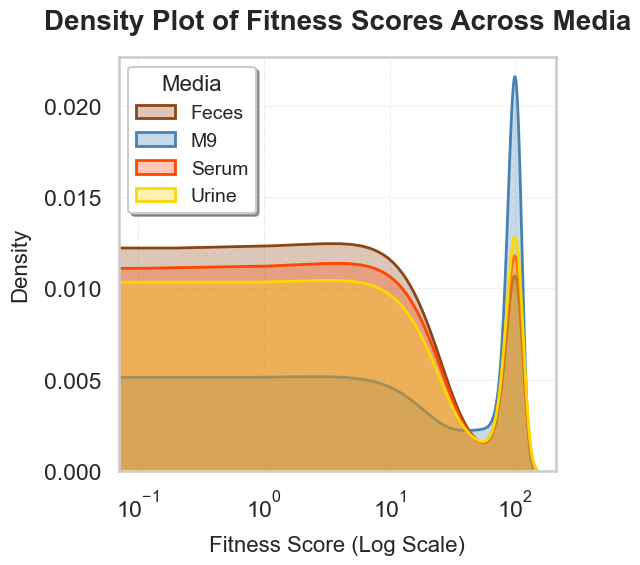

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#exploded_fitness_rare = pd.read_csv("/exploded_fitness_rare.csv")

# Ensure fitness scores are filled for missing media with 0
exploded_fitness_rare_pivot = (
    exploded_fitness_rare.pivot_table(
        index='reaction_id', 
        columns='media_name', 
        values='fitness', 
        aggfunc='mean',  # Take the mean if there are multiple entries
        fill_value=0     # Fill missing media fitness with 0
    )
)

# Apply combined filtering conditions
filtered_fitness = exploded_fitness_rare_pivot[
    (exploded_fitness_rare_pivot >= 5).any(axis=1)
]

# Melt the filtered DataFrame for density plot
filtered_fitness_melted = filtered_fitness.reset_index().melt(
    id_vars='reaction_id', 
    var_name='Media', 
    value_name='Fitness'
)

# Simplify media names
media_name_mapping = {
    'feces_media': 'Feces',
    'm9_aerobic': 'M9',
    'serum_media': 'Serum',
    'urine_media': 'Urine'
}
filtered_fitness_melted['Media'] = filtered_fitness_melted['Media'].map(media_name_mapping)

# Define custom colors for the media
color_mapping = {
    'Feces': '#8B4513',  # Brown
    'M9': '#4682B4',     # Blue
    'Serum': '#FF4500',  # Red
    'Urine': '#FFD700'   # Yellow
}

# Set aesthetic style
sns.set_theme(style="whitegrid", context="talk")

# Create the density plot
plt.figure(figsize=(6, 6))
for media, color in color_mapping.items():
    sns.kdeplot(
        data=filtered_fitness_melted[filtered_fitness_melted['Media'] == media],
        x='Fitness',
        label=media,
        color=color,
        fill=True,  # Fill the density area
        alpha=0.3,  # Slight transparency for a polished look
        linewidth=2  # Line width for density curves
    )

# Customize the plot
plt.xscale('log')  # Use log scale for the x-axis
plt.title("Density Plot of Fitness Scores Across Media", fontsize=20, weight='bold', pad=20)
plt.xlabel("Fitness Score (Log Scale)", fontsize=16, labelpad=10)
plt.ylabel("Density", fontsize=16, labelpad=10)
plt.legend(title="Media", fontsize=14, title_fontsize=16, loc='upper left', frameon=True, shadow=True)
plt.grid(alpha=0.4, linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.savefig("/Users/omidard/Desktop/fitness_density_plot.svg", format="svg", dpi=300)
plt.show()


/var/folders/g4/gzd2bm953vs0rn_qkz4wyd1w0000gp/T/ipykernel_62491/2073043268.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


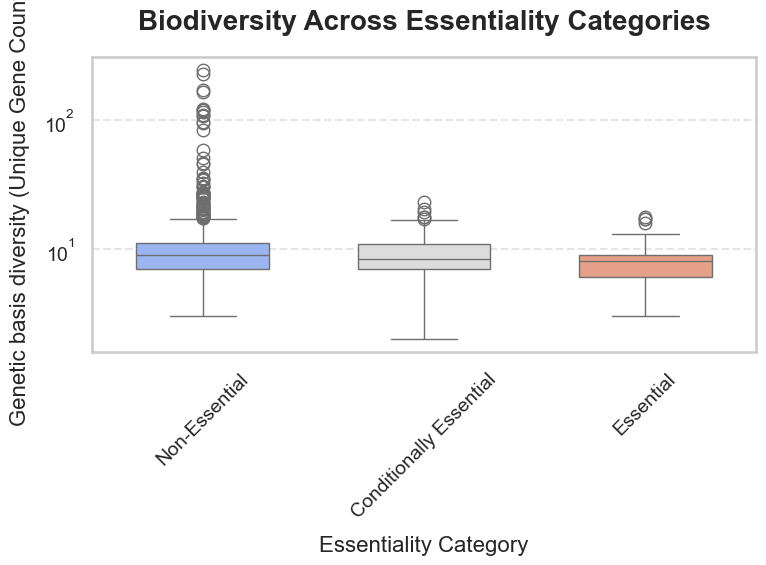

In [12]:
reaction_analysis = pd.read_csv("/reaction_analysis.csv")
category_order = ['Non-Essential', 'Conditionally Essential', 'Essential']
# Step 6: Create the box plot
sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(8, 6))

# Create the box plot with specified order
sns.boxplot(
    data=reaction_analysis,
    x='Essentiality_Category',
    y='norm',
    order=category_order,
    palette='coolwarm',
    showfliers=True,  # Show outliers
    width=0.6  # Adjust width of boxes
)
"""
# Overlay a swarm plot for detailed data points
sns.swarmplot(
    data=reaction_analysis,
    x='Essentiality_Category',
    y='biodiversity',
    color='black',
    alpha=0.6,
    size=2
)
"""
# Customize the plot
plt.title("Biodiversity Across Essentiality Categories", fontsize=20, weight='bold', pad=20)
plt.xlabel("Essentiality Category", fontsize=16, labelpad=10)
plt.ylabel("Genetic basis diversity (Unique Gene Count)", fontsize=16, labelpad=10)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.yscale('log')  # Use logarithmic scale for biodiversity

# Tight layout and save the plot
plt.tight_layout()
#plt.savefig("biodiversity_boxplot_updated_logic.svg", format="svg", dpi=300)

# Show the plot
plt.show()

In [13]:
reaction_analysis_es = reaction_analysis[reaction_analysis['Essentiality_Category']=='Essential']
reaction_analysis_ns = reaction_analysis[reaction_analysis['Essentiality_Category']=='Non-Essential']
reaction_analysis_ce = reaction_analysis[reaction_analysis['Essentiality_Category']=='Conditionally Essential']



from scipy.stats import f_oneway, kruskal, shapiro, levene
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine data from all groups into a single structure
biodiversity_essential = reaction_analysis_es['biodiversity']
biodiversity_ns = reaction_analysis_ns['biodiversity']
biodiversity_ce = reaction_analysis_ce['biodiversity']

# Step 1: Test for normality
print("Shapiro-Wilk Test for Normality:")
print("Essential:", shapiro(biodiversity_essential))
print("Non-Essential:", shapiro(biodiversity_ns))
print("Conditionally Essential:", shapiro(biodiversity_ce))

# Step 2: Test for homogeneity of variances
print("\nLevene's Test for Equal Variances:")
print(levene(biodiversity_essential, biodiversity_ns, biodiversity_ce))

# Step 3: Perform ANOVA if assumptions are met, or Kruskal-Wallis otherwise
if shapiro(biodiversity_essential).pvalue > 0.05 and \
   shapiro(biodiversity_ns).pvalue > 0.05 and \
   shapiro(biodiversity_ce).pvalue > 0.05 and \
   levene(biodiversity_essential, biodiversity_ns, biodiversity_ce).pvalue > 0.05:
    print("\nANOVA Results:")
    anova_result = f_oneway(biodiversity_essential, biodiversity_ns, biodiversity_ce)
    print(anova_result)

    # If ANOVA is significant, perform Tukey's HSD
    if anova_result.pvalue < 0.05:
        data = reaction_analysis_es.assign(Group="Essential")
        data = data.append(reaction_analysis_ns.assign(Group="Non-Essential"))
        data = data.append(reaction_analysis_ce.assign(Group="Conditionally Essential"))
        tukey = pairwise_tukeyhsd(data['biodiversity'], data['Group'], alpha=0.05)
        print("\nTukey's HSD Results:")
        print(tukey)
else:
    print("\nKruskal-Wallis Test Results:")
    kruskal_result = kruskal(biodiversity_essential, biodiversity_ns, biodiversity_ce)
    print(kruskal_result)


Shapiro-Wilk Test for Normality:
Essential: ShapiroResult(statistic=0.6331082582473755, pvalue=6.412932251204095e-13)
Non-Essential: ShapiroResult(statistic=0.6972246170043945, pvalue=0.0)
Conditionally Essential: ShapiroResult(statistic=0.7510628700256348, pvalue=8.107495286290099e-15)

Levene's Test for Equal Variances:
LeveneResult(statistic=25.297195729403597, pvalue=1.3661004393449632e-11)

Kruskal-Wallis Test Results:
KruskalResult(statistic=71.68200552368171, pvalue=2.7192571219210093e-16)


In [14]:
from scipy.stats import mannwhitneyu
from itertools import combinations

# Create pairwise group combinations
groups = {
    'Essential': biodiversity_essential,
    'Non-Essential': biodiversity_ns,
    'Conditionally Essential': biodiversity_ce
}
comparisons = list(combinations(groups.keys(), 2))

# Perform pairwise Mann-Whitney U tests
results = []
for g1, g2 in comparisons:
    stat, p = mannwhitneyu(groups[g1], groups[g2], alternative='two-sided')
    results.append((g1, g2, stat, p))

# Correct for multiple comparisons using Bonferroni correction
corrected_results = [(g1, g2, stat, p, p * len(comparisons)) for g1, g2, stat, p in results]

# Display results
for g1, g2, stat, p, corrected_p in corrected_results:
    print(f"Comparison: {g1} vs {g2}")
    print(f"  Statistic: {stat}, p-value: {p}, Corrected p-value: {corrected_p}")


Comparison: Essential vs Non-Essential
  Statistic: 41859.0, p-value: 8.422217286769292e-14, Corrected p-value: 2.5266651860307874e-13
Comparison: Essential vs Conditionally Essential
  Statistic: 4053.5, p-value: 1.2785757303721071e-05, Corrected p-value: 3.8357271911163215e-05
Comparison: Non-Essential vs Conditionally Essential
  Statistic: 186200.5, p-value: 1.6693124365132868e-05, Corrected p-value: 5.00793730953986e-05


Venn diagrams are only supported for 2 or 3 media.


/opt/anaconda3/lib/python3.9/site-packages/upsetplot/data.py:387: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/opt/anaconda3/lib/python3.9/site-packages/upsetplot/plotting.py:660: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/opt/anac

<Figure size 1000x600 with 0 Axes>

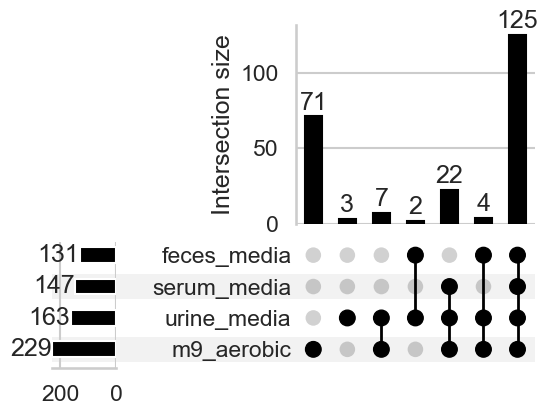

In [16]:
import pandas as pd
from matplotlib_venn import venn2, venn3
from upsetplot import from_contents, UpSet
import matplotlib.pyplot as plt

# Load the exploded fitness data
exploded_fitness_all_ess = pd.read_csv("/exploded_fitness_all_ess.csv")

# Group by 'media_name'
media_groups = exploded_fitness_all_ess.groupby('media_name')

# Initialize a dictionary to store reactions specific to each media
media_specific_reactions = {}

# Identify reactions specific to each media
for media_name, group in media_groups:
    media_specific_reactions[media_name] = set(group['reaction_id'])

# Plot Venn diagram if there are up to 3 media
if len(media_specific_reactions) == 2:
    media_names = list(media_specific_reactions.keys())
    venn2([media_specific_reactions[media_names[0]], media_specific_reactions[media_names[1]]],
          set_labels=(media_names[0], media_names[1]))
    plt.title('Venn Diagram of Media-Specific Reactions')
    plt.tight_layout()
    plt.savefig('/Users/omidard/Desktop/EcolipanGEM_final_panels/paper2/venn_diagram_2_media.svg', format='svg')
    plt.show()
elif len(media_specific_reactions) == 3:
    media_names = list(media_specific_reactions.keys())
    venn3([media_specific_reactions[media_names[0]],
           media_specific_reactions[media_names[1]],
           media_specific_reactions[media_names[2]]],
          set_labels=(media_names[0], media_names[1], media_names[2]))
    plt.title('Venn Diagram of Media-Specific Reactions')
    plt.tight_layout()
    plt.savefig('/Users/omidard/Desktop/EcolipanGEM_final_panels/paper2/venn_diagram_3_media.svg', format='svg')
    plt.show()
else:
    print("Venn diagrams are only supported for 2 or 3 media.")

# Create an UpSet plot
upset_data = from_contents(media_specific_reactions)
upset = UpSet(upset_data, show_counts=True)
plt.figure(figsize=(10, 6))
upset.plot()
#plt.title('UpSet Plot of Media-Specific Reactions')
plt.tight_layout()
#plt.savefig('/Users/omidard/Desktop/EcolipanGEM_final_panels/paper2/upset_plot_media_reactions.svg', format='svg')
plt.show()
